## TESTING

In [1]:
import numpy as np
import tensorflow as tf
import cv2
import os
import imghdr
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model = load_model('models/flowers_second_model.h5')

In [3]:
flower_categories = ['daisy', 'dandelion' , 'rose', 'sunflower' , 'tulip']

In [4]:
flowers_pred_dir = 'flowers_test_prediction'

1/1 [==============================] - 0s 84ms/step

Image path: flowers_test_prediction\testdaisy1.jpg
Result: [1. 0. 0. 0. 0.] Prediction: daisy


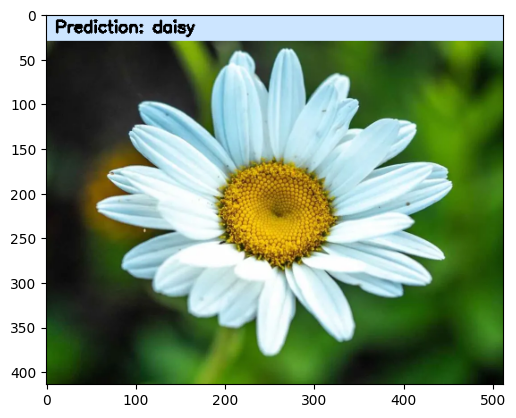



1/1 [==============================] - 0s 35ms/step

Image path: flowers_test_prediction\testdaisy2.jpg
Result: [1. 0. 0. 0. 0.] Prediction: daisy


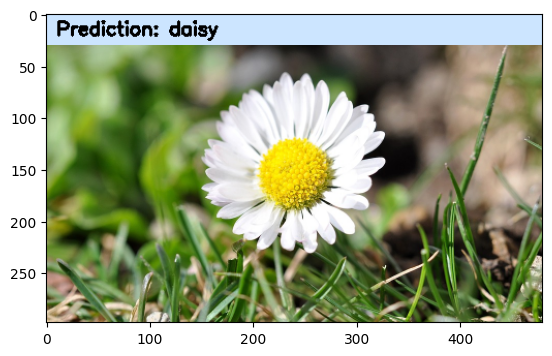



1/1 [==============================] - 0s 42ms/step

Image path: flowers_test_prediction\testdandelion1.jpg
Result: [0. 1. 0. 0. 0.] Prediction: dandelion


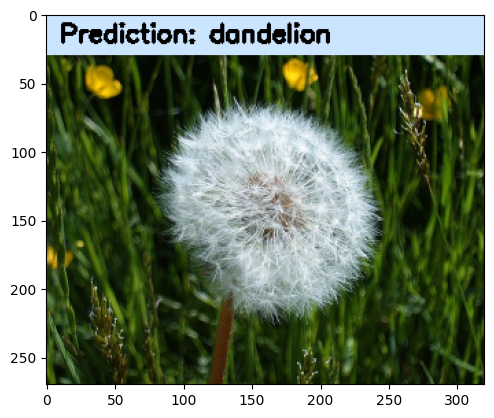



1/1 [==============================] - 0s 45ms/step

Image path: flowers_test_prediction\testdandelion2.jpg
Result: [0. 1. 0. 0. 0.] Prediction: dandelion


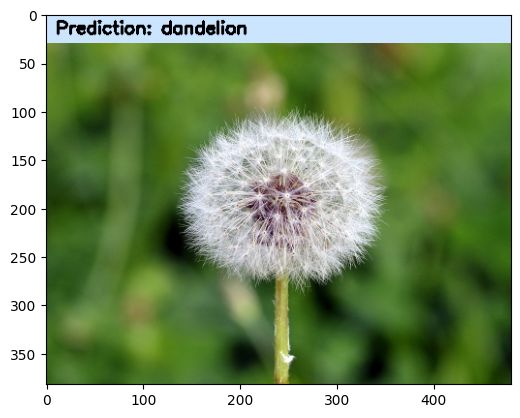



1/1 [==============================] - 0s 38ms/step

Image path: flowers_test_prediction\testrose1.jpg
Result: [0. 0. 1. 0. 0.] Prediction: rose


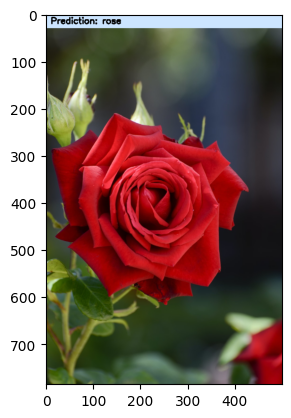



1/1 [==============================] - 0s 41ms/step

Image path: flowers_test_prediction\testrose2.jpg
Result: [0. 0. 0. 0. 1.] Prediction: tulip


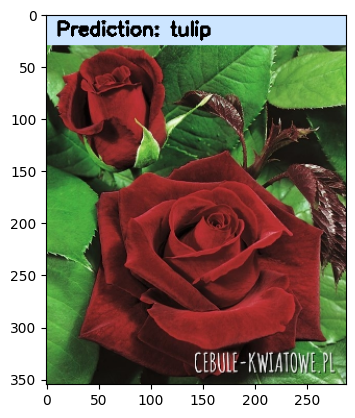



1/1 [==============================] - 0s 51ms/step

Image path: flowers_test_prediction\testrose3.jpg
Result: [0. 0. 1. 0. 0.] Prediction: rose


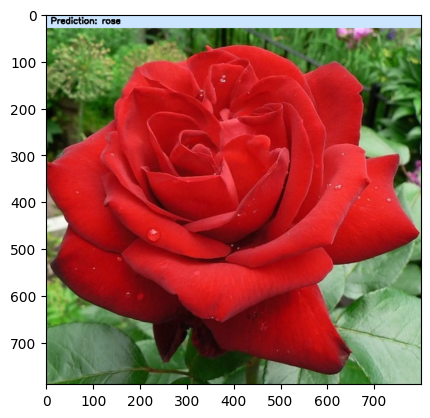



1/1 [==============================] - 0s 37ms/step

Image path: flowers_test_prediction\testsunflower1.jpg
Result: [0. 0. 0. 1. 0.] Prediction: sunflower


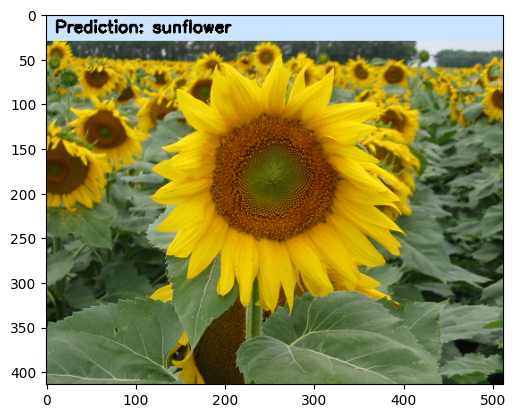



1/1 [==============================] - 0s 40ms/step

Image path: flowers_test_prediction\testsunflower2.jpg
Result: [0. 0. 0. 1. 0.] Prediction: sunflower


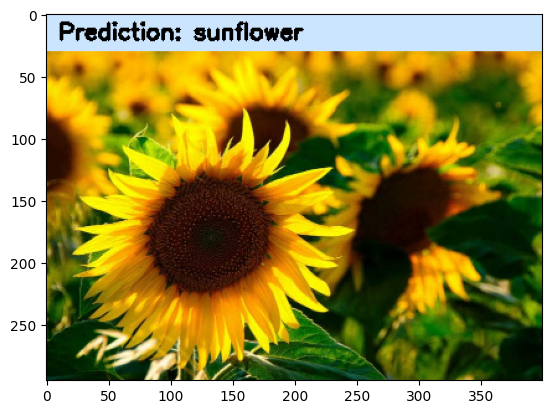



1/1 [==============================] - 0s 42ms/step

Image path: flowers_test_prediction\testtulip1.jpg
Result: [0. 0. 0. 0. 1.] Prediction: tulip


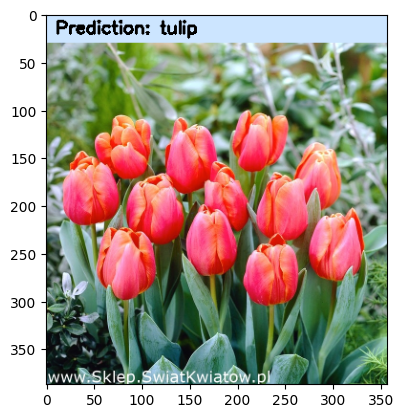



1/1 [==============================] - 0s 36ms/step

Image path: flowers_test_prediction\testtulip2.jpg
Result: [0. 0. 0. 1. 0.] Prediction: sunflower


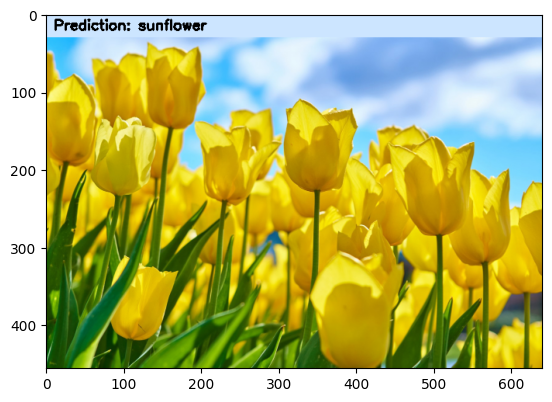



1/1 [==============================] - 0s 46ms/step

Image path: flowers_test_prediction\testtulip3.jpg
Result: [0. 0. 0. 0. 1.] Prediction: tulip


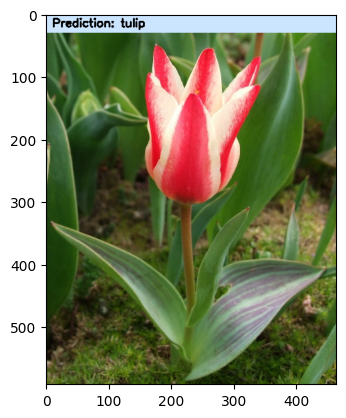

In [12]:
for img in os.listdir(flowers_pred_dir):
    image_path = os.path.join(flowers_pred_dir, img)
    test_image = image.load_img(image_path, target_size=(224,224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    
    result = model.predict(test_image)
    flower_pred = flower_categories[np.argmax(result[0])]
    
    img_final = cv2.imread(image_path)
    
    # resize image  
    scale_percent = 50 # percent of original size
    width = int(img_final.shape[1] * scale_percent / 100)
    height = int(img_final.shape[0] * scale_percent / 100)
    dim = (width, height)
    img_final = cv2.resize(img_final, dim)
    
    header = np.zeros((30, img_final.shape[1], 3), np.uint8)
    header[:] = (255, 229, 204)
    vcat = cv2.vconcat((header, img_final))
    plt.imshow(vcat)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(vcat,f'Prediction: {flower_pred}', (10,20), font, 0.6, (0,0,0), 2, 0)
    plt.imshow(cv2.cvtColor(vcat, cv2.COLOR_BGR2RGB))
    print(f'\nImage path: {image_path}')
    print(f'Result: {result[0]} Prediction: {flower_pred}')
    plt.show()
    print('\n')